<a href="https://colab.research.google.com/github/naveenmk404/INN_Lab/blob/main/program_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch = 0 , loss = 0.28318958906443975
epoch = 1000 , loss = 0.2511397143814502
epoch = 2000 , loss = 0.25066250355019487
epoch = 3000 , loss = 0.25024359708410093
epoch = 4000 , loss = 0.24984909904873373
epoch = 5000 , loss = 0.2494600632875026
epoch = 6000 , loss = 0.24905796930121282
epoch = 7000 , loss = 0.2486234169721041
epoch = 8000 , loss = 0.24813475633872903
epoch = 9000 , loss = 0.2475665964491037
epoch = 0 , loss = 0.32226166596191774
epoch = 1000 , loss = 0.23607465348875356
epoch = 2000 , loss = 0.22571014203357392
epoch = 3000 , loss = 0.21466158164475752
epoch = 4000 , loss = 0.1985252211103719
epoch = 5000 , loss = 0.1724581784372169
epoch = 6000 , loss = 0.14087497829754747
epoch = 7000 , loss = 0.1151884023527486
epoch = 8000 , loss = 0.09860126015821963
epoch = 9000 , loss = 0.08846806722298366
epoch = 0 , loss = 0.3554116985980176
epoch = 1000 , loss = 0.2500396268535296
epoch = 2000 , loss = 0.25001326268300533
epoch = 3000 , loss = 0.25000445069337257
epoch = 40

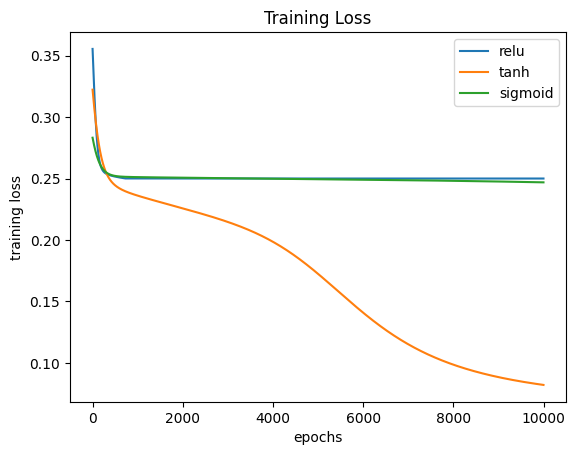

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2

def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return np.where(x>0,1,0)

def intialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)

    hidden_layer_input_weights = np.random.randn(input_size, hidden_size)
    hidden_layer_output_weights = np.random.randn(hidden_size, output_size)

    return hidden_layer_input_weights, hidden_layer_output_weights


def forwardPropogation(inputs, hidden_layer_input_weights,hidden_layer_output_weights, activation_function):

    hidden_layer_input = np.dot(inputs,hidden_layer_input_weights)
    hidden_layer_output = activation_function(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output,hidden_layer_output_weights)
    output_layer_output = sigmoid(output_layer_input)

    return hidden_layer_output,output_layer_output

def backwardPropogation(inputs, target, hidden_layer_input_weights, hidden_layer_output_weights, hidden_layer_output, output_layer_output,
                         activation_derivative, learning_rate ):

    output_error = target-output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_layer_error = output_delta.dot(hidden_layer_output_weights.T)
    hidden_layer_delta = hidden_layer_error * activation_derivative(hidden_layer_output)

    hidden_layer_output_weights += hidden_layer_output.T.dot(output_delta)*learning_rate
    hidden_layer_input_weights += inputs.T.dot(hidden_layer_delta)*learning_rate

def training_neural_network(inputs,target,hidden_size,output_size,learning_rate,epochs,activation_function,activation_derivative):
    input_size=inputs.shape[1]
    hidden_layer_input_weights,hidden_layer_output_weights=intialize_weights(input_size,hidden_size,output_size)

    loss_history = []

    for epoch in range(epochs):
        hidden_layer_output, output_layer_output = forwardPropogation(inputs,hidden_layer_input_weights,hidden_layer_output_weights,activation_function)

        backwardPropogation(inputs, target, hidden_layer_input_weights, hidden_layer_output_weights, hidden_layer_output, output_layer_output,
                         activation_derivative, learning_rate )

        loss = calculate_loss(target,output_layer_output)
        loss_history.append(loss)

        if epoch % 1000 == 0 :
            print(f"epoch = {epoch} , loss = {loss}")

    return hidden_layer_input_weights,hidden_layer_output_weights,loss_history

def calculate_loss(target,output_layer_output):
    loss = np.mean((target-output_layer_output)**2)
    return loss

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[1],[1],[0]])
learning_rate = 0.01
epochs = 10000
hidden_size = 4
output_size = 1

sigmoid_hidden_layer_input_weights,sigmoid_hidden_layer_output_weights,sigmoid_loss_history = training_neural_network(inputs,target,
                                                                                                                       hidden_size,output_size,learning_rate,epochs,sigmoid,sigmoid_derivative)
sigmoid_hidden_layer_input_weights,sigmoid_hidden_layer_output_weights,tanh_loss_history = training_neural_network(inputs,target,
                                                                                                                       hidden_size,output_size,learning_rate,epochs,tanh,tanh_derivative)
sigmoid_hidden_layer_input_weights,sigmoid_hidden_layer_output_weights,relu_loss_history = training_neural_network(inputs,target,
                                                                                                                       hidden_size,output_size,learning_rate,epochs,relu,relu_derivative)

plt.plot(relu_loss_history, label='relu')
plt.plot(tanh_loss_history, label='tanh')
plt.plot(sigmoid_loss_history, label='sigmoid')
plt.title("Training Loss")
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.legend()
plt.show()
